In [250]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import seaborn as sns
#read file 1
df = pd.read_csv('202105_fixed_laua_coverage_r01.csv', header=0)
df.head(10)
df.shape

(374, 40)

In [214]:
df.head()

,laua,laua_name,All Premises,All Matched Premises,SFBB availability (% premises),UFBB (100Mbit/s) availability (% premises),UFBB availability (% premises),Full Fibre availability (% premises),Gigabit availability (% premises),% of premises unable to receive 2Mbit/s,...,Number of premises with 0<2Mbit/s download speed,Number of premises with 2<5Mbit/s download speed,Number of premises with 5<10Mbit/s download speed,Number of premises with 10<30Mbit/s download speed,% of premises with 30<300Mbit/s download speed,% of premises with >=300Mbit/s download speed,% of premises with 0<2Mbit/s download speed,% of premises with 2<5Mbit/s download speed,% of premises with 5<10Mbit/s download speed,% of premises with 10<30Mbit/s download speed
0,S12000033,ABERDEEN CITY,127083,126107,94.4,61.5,55.8,51.2,51.2,0.1,...,65,145,509,5393,38.7,55.8,0.1,0.1,0.4,4.2
1,S12000034,ABERDEENSHIRE,126320,125293,83.2,11.7,11.6,11.6,11.6,2.6,...,3241,3966,4395,8644,71.5,11.6,2.6,3.1,3.5,6.8
2,E07000223,ADUR,29865,29795,98.7,85.7,85.4,1.5,1.5,0.0,...,3,11,32,274,13.3,85.4,0.0,0.0,0.1,0.9
3,E07000026,ALLERDALE,51812,51555,92.6,3.2,3.2,3.2,3.2,1.2,...,601,502,513,1940,89.4,3.2,1.2,1.0,1.0,3.7
4,E07000032,AMBER VALLEY,61441,61100,95.2,30.8,27.4,24.3,24.3,0.1,...,61,134,258,2151,67.9,27.4,0.1,0.2,0.4,3.5


In [215]:
#Checking null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 40 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   laua                                                          374 non-null    object 
 1   laua_name                                                     374 non-null    object 
 2   All Premises                                                  374 non-null    int64  
 3   All Matched Premises                                          374 non-null    int64  
 4   SFBB availability (% premises)                                374 non-null    float64
 5   UFBB (100Mbit/s) availability (% premises)                    374 non-null    float64
 6   UFBB availability (% premises)                                374 non-null    float64
 7   Full Fibre availability (% premises)                          374 non-n

In [216]:
#select specific columns I need: Name of area, number of house based on download speed
subdf = df[['laua_name',
#             'Number of premises with 0<2Mbit/s download speed',
#             'Number of premises with 2<5Mbit/s download speed',
#             'Nmber of premises with 5<10Mbit/s download speed',
#             'Number of premises with 10<30Mbit/s download speed',
#             'Number of premises with 30<300Mbit/s download speed',
#             'Number of premises with >=300Mbit/s download speed',
            'Full Fibre availability (% premises)',
            'SFBB availability (% premises)',
            'UFBB availability (% premises)',
            '% of premises with 0<2Mbit/s download speed',
            '% of premises with 2<5Mbit/s download speed',
            '% of premises with 5<10Mbit/s download speed'
            
        ]]
#Change 'laua_name' to 'Name', speed - simplify for join
subdf1 = subdf.rename({'laua_name':'Name','Number of premises with 0<2Mbit/s download speed':'1(0<2)',
                       'Number of premises with 2<5Mbit/s download speed':'2(2<5)',
                       'Number of premises with 5<10Mbit/s download speed': '3(5<10)',
                       'Number of premises with 10<30Mbit/s download speed': '4(10<30)',
                       'Number of premises with 30<300Mbit/s download speed': '5(30<300)',
                       'Number of premises with >=300Mbit/s download speed': '6(300<=)'},
                      
                      
                      
                      
                      
                      axis='columns')
subdf1.head()

,Name,Full Fibre availability (% premises),SFBB availability (% premises),UFBB availability (% premises),% of premises with 0<2Mbit/s download speed,% of premises with 2<5Mbit/s download speed,% of premises with 5<10Mbit/s download speed
0,ABERDEEN CITY,51.2,94.4,55.8,0.1,0.1,0.4
1,ABERDEENSHIRE,11.6,83.2,11.6,2.6,3.1,3.5
2,ADUR,1.5,98.7,85.4,0.0,0.0,0.1
3,ALLERDALE,3.2,92.6,3.2,1.2,1.0,1.0
4,AMBER VALLEY,24.3,95.2,27.4,0.1,0.2,0.4


In [217]:
#read file 2
df2 = pd.read_excel('2001-la-class-dataset-post0409-boundaries.xlsx', header=0)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 21 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Name                                                               335 non-null    object 
 1   Region                                                             332 non-null    object 
 2   District Code                                                      332 non-null    object 
 3   ONS code                                                           326 non-null    object 
 4   Total Population1                                                  333 non-null    float64
 5   Major Urban Population                                             327 non-null    float64
 6   Large Urban Population                                             327 non-null    float64
 7   Other Urban Population    

In [218]:
df2.head()
#Capitalize Name value for join
df2['Name']=df2['Name'].str.upper()

In [219]:
#select specific columns I need: Name, total population, Classification, Numeric classification
subdf2 = df2[['Name', 'Total Population1', 'Classification','Numerical classification']]

In [220]:
df2.head()
df2.shape

(339, 21)

In [221]:
#join subdf1 and subdf2 (inner join)
innerjoindf = pd.merge(subdf1,
                  subdf2,
                  on ='Name',
                  how ='inner')
innerjoindf.shape

(296, 10)

In [222]:
outerjoindf = pd.merge(subdf1,
                  subdf2,
                  on ='Name',
                  how ='outer')
outerjoindf.shape

(417, 10)

In [242]:
innerjoindf.head(20)

,Name,Full Fibre availability (% premises),SFBB availability (% premises),UFBB availability (% premises),% of premises with 0<2Mbit/s download speed,% of premises with 2<5Mbit/s download speed,% of premises with 5<10Mbit/s download speed,Total Population1,Classification,Numerical classification
0,ADUR,1.5,98.7,85.4,0.0,0.0,0.1,59571.0,LU,2.0
1,ALLERDALE,3.2,92.6,3.2,1.2,1.0,1.0,93577.0,R80,6.0
2,AMBER VALLEY,24.3,95.2,27.4,0.1,0.2,0.4,116484.0,SR,4.0
3,ARUN,8.3,96.5,10.6,0.1,0.1,0.2,140841.0,LU,2.0
4,ASHFIELD,3.9,98.0,86.6,0.0,0.4,0.1,111295.0,OU,3.0
5,ASHFORD,9.4,90.8,46.5,0.3,1.4,1.6,102553.0,SR,4.0
6,BABERGH,10.6,93.9,14.6,0.4,0.4,0.4,83523.0,R80,6.0
7,BARKING AND DAGENHAM,51.3,98.3,89.8,0.0,0.4,0.4,164138.0,MU,1.0
8,BARNET,22.5,97.2,56.7,0.0,0.0,0.1,314936.0,MU,1.0
9,BARNSLEY,22.9,97.9,66.6,0.1,0.2,0.1,218101.0,OU,3.0


In [224]:
# #show, but need to adjust or need much better codes!!!
# plt.scatter(innerjoindf['Numerical classification'],innerjoindf['1(0<2)'],color='blue', marker= 'o', label='1')
# plt.scatter(innerjoindf['Numerical classification'],innerjoindf['2(2<5)'] , marker='v', label='2')
# plt.scatter(innerjoindf['Numerical classification'],innerjoindf['3(5<10)'],marker='.', label='3')
# plt.legend()

In [225]:
# Here I am trying to compare the availability of different types of braodband in different types of area. 
# Full Fibre = Fastest and most recently rolled out option
# UFBB (UltraFast Broadband) = older & slower 
# SFBB (Superfast Broadband) = oldest and slowest

meanFF = innerjoindf.groupby(['Classification'], as_index=False)['Full Fibre availability (% premises)'].mean()
meanFF
meanSFBB = innerjoindf.groupby(['Classification'], as_index=False)['SFBB availability (% premises)'].mean()
meanSFBB
meanUFBB = innerjoindf.groupby(['Classification'], as_index=False)['UFBB availability (% premises)'].mean()
meanUFBB

,Classification,UFBB availability (% premises)
0,LU,73.864706
1,MU,77.726761
2,OU,70.460000
3,R50,37.687805
4,R80,26.155319
5,SR,53.037500


In [226]:
# Re-indexing to order from most urban - most rural
# MU = Major Urban
# LU = Large Urban
# OU = Other Urban
# SR = Semi Rural
# R50 = 50% rural
# R80 = 80% Rural
meanFF=meanFF.reindex([1,0,2,5,3,4])
meanFF
meanSFBB=meanSFBB.reindex([1,0,2,5,3,4])
meanSFBB
meanUFBB=meanUFBB.reindex([1,0,2,5,3,4])
meanUFBB

,Classification,UFBB availability (% premises)
1,MU,77.726761
0,LU,73.864706
2,OU,70.460000
5,SR,53.037500
3,R50,37.687805
4,R80,26.155319


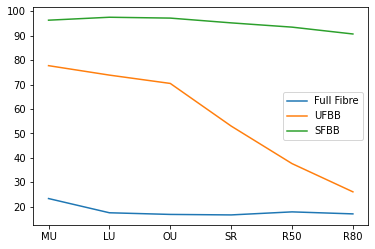

In [227]:
# This plot shows the results (mean % of premises that can receive each option in each area type)
# I think this shows the trends well, the oldest option (SFBB) has good coverage across all areas and the newest (Full Fibre)
# has only attained around 25% coverage in the most urbanised regions. 
# All broadband options show a general trend of coverage decreasing as regions become more rural, this is particularly evident
# in the UFBB coverage line
plt.plot(meanFF['Classification'],meanFF['Full Fibre availability (% premises)'],label ='Full Fibre')
plt.plot(meanUFBB['Classification'],meanUFBB['UFBB availability (% premises)'],label ='UFBB')
plt.plot(meanSFBB['Classification'],meanSFBB['SFBB availability (% premises)'],label ='SFBB')
plt.legend()
plt.show()

In [284]:
# With this section I was thinking about how low download speeds can affect peoples internet experience.
# One thing highlighted during the pandemic was the importance of high quality connections to enable children to access online
# learning, particularly live lessons with their class. For video conferencing, recommended minimum download speeds are around
# 8MBps so I have filtered the dataset to find the areas that do do not meet this (and therefore may not be able to access online learning)
new_df = innerjoindf[(innerjoindf['% of premises with 0<2Mbit/s download speed'] >=1) | (innerjoindf['% of premises with 2<5Mbit/s download speed'] >=1) |(innerjoindf['% of premises with 5<10Mbit/s download speed'] >=1)]
new_df
# We see from the results there are 49 areas returned
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 1 to 284
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Name                                          49 non-null     object 
 1   Full Fibre availability (% premises)          49 non-null     float64
 2   SFBB availability (% premises)                49 non-null     float64
 3   UFBB availability (% premises)                49 non-null     float64
 4   % of premises with 0<2Mbit/s download speed   49 non-null     float64
 5   % of premises with 2<5Mbit/s download speed   49 non-null     float64
 6   % of premises with 5<10Mbit/s download speed  49 non-null     float64
 7   Total Population1                             49 non-null     float64
 8   Classification                                49 non-null     object 
 9   Numerical classification                      49 non-null     floa

In [285]:
new_df.head(49)

,Name,Full Fibre availability (% premises),SFBB availability (% premises),UFBB availability (% premises),% of premises with 0<2Mbit/s download speed,% of premises with 2<5Mbit/s download speed,% of premises with 5<10Mbit/s download speed,Total Population1,Classification,Numerical classification
1,ALLERDALE,3.2,92.6,3.2,1.2,1.0,1.0,93577.0,R80,6.0
5,ASHFORD,9.4,90.8,46.5,0.3,1.4,1.6,102553.0,SR,4.0
27,BRECKLAND,21.8,91.1,23.1,0.7,1.0,1.2,121449.0,R80,6.0
43,CARLISLE,6.0,94.1,48.1,0.8,0.8,1.0,100679.0,SR,4.0
53,CHICHESTER,21.2,90.5,22.8,0.3,0.6,1.2,106518.0,R80,6.0
58,CORNWALL,32.0,87.2,34.9,0.3,0.7,1.3,499399.0,R80,6.0
61,CRAVEN,12.7,92.1,17.8,1.0,0.8,1.1,53578.0,R80,6.0
65,DARLINGTON,2.9,94.5,83.5,0.7,1.2,1.1,97712.0,OU,3.0
68,DERBYSHIRE DALES,9.0,89.9,9.0,0.5,1.2,1.8,69616.0,R80,6.0
74,EAST DEVON,35.0,89.5,35.7,0.5,1.5,1.9,125345.0,R50,5.0


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


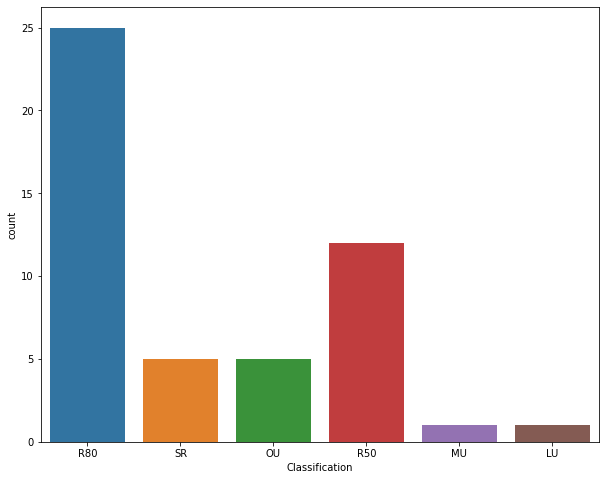

In [304]:
# My next step would be to group by classification again and plot a count(histogram?) of the number of local authorities in each
# It looks like most of the areas that cannot get minimum speeds are in the most rural classifications (R80 and R50)
# with no major or large urban areas unable to meet the min requirements
# plt.hist(new_df['Classification'], align ='left')
# plt.show()
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot('Classification',data = new_df)
plt.show()

In [257]:
# I also thought it would be interesting to create a new column multiplying the % of premises (0<2,2<5,5<10) by the total population
# This would give us a rough indication of how many people are potentially disadvantaged by low speeds

In [294]:
innerjoindf.corr()

,Full Fibre availability (% premises),SFBB availability (% premises),UFBB availability (% premises),% of premises with 0<2Mbit/s download speed,% of premises with 2<5Mbit/s download speed,% of premises with 5<10Mbit/s download speed,Total Population1,Numerical classification
Full Fibre availability (% premises),1.000000,-0.032524,0.205822,-0.148225,-0.094891,-0.039134,0.244167,-0.121805
SFBB availability (% premises),-0.032524,1.000000,0.543053,-0.637531,-0.717757,-0.723895,0.192676,-0.463436
UFBB availability (% premises),0.205822,0.543053,1.000000,-0.546919,-0.509842,-0.458892,0.332364,-0.712419
% of premises with 0<2Mbit/s download speed,-0.148225,-0.637531,-0.546919,1.000000,0.861004,0.735510,-0.248522,0.530313
% of premises with 2<5Mbit/s download speed,-0.094891,-0.717757,-0.509842,0.861004,1.000000,0.916544,-0.230116,0.552716
% of premises with 5<10Mbit/s download speed,-0.039134,-0.723895,-0.458892,0.735510,0.916544,1.000000,-0.170112,0.516145
Total Population1,0.244167,0.192676,0.332364,-0.248522,-0.230116,-0.170112,1.000000,-0.423658
Numerical classification,-0.121805,-0.463436,-0.712419,0.530313,0.552716,0.516145,-0.423658,1.000000


<AxesSubplot:>

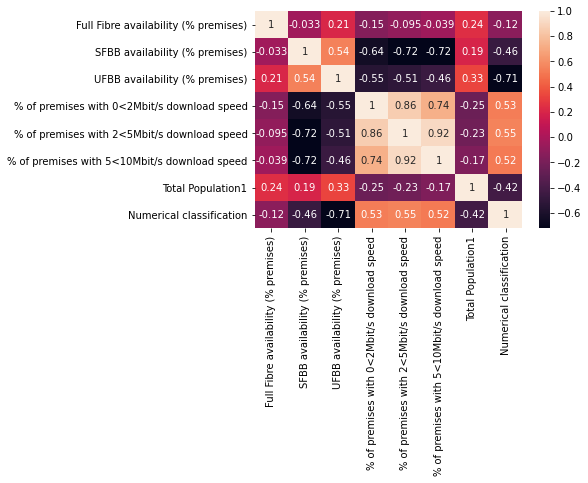

In [297]:
figsize=(50,50)
sns.heatmap(innerjoindf.corr(),annot=True)

In [302]:
help(df.corr())

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame, pandas.core.arraylike.OpsMixin)
 |  DataFrame(data=None, index: 'Optional[Axes]' = None, columns: 'Optional[Axes]' = None, dtype: 'Optional[Dtype]' = None, copy: 'bool' = False)
 |  
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, dataclass or list-like objects. If
 |      data is a dict, column order follows insertion-order.
 |  
 |      .. versionchanged:: 0.25.0
 |         If data is a list of dicts, column order follows insertion-order.
 |  
 |  index : Index o